### 필요한 모듈 불러오기

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

### Output gap(IP - HP필터값) 구하기

In [2]:
# 한글깨짐 방지
# from matplotlib import font_manager, rc
# font_fname = 'c:/windows/fonts/gulim.ttc'
# font_name = font_manager.FontProperties(fname=font_fname).get_name()
# rc('font', family=font_name)

# IP값 불러오기
ip = pd.read_csv('./IP.csv', index_col=0)

# hp필터값 계산
cycle, trend = sm.tsa.filters.hpfilter(ip['산업생산지수'], 1600)

# Output gap 계산
ip['trend'] = trend
ip['cycle'] = cycle

### 상관관계 분석

In [4]:
tone_mkt = pd.read_csv('./tone_mkt_mean.csv', index_col=0)

policy_rate=pd.read_csv('./Policy_rate.csv', index_col=0)
epu_kor=pd.read_csv('./EPU_kor.csv', index_col=0)
epu_us=pd.read_csv('./EPU_us.csv', index_col=0)
ui=pd.read_csv('./UI_kor.csv', index_col=0)

output_gap = ip[['date', 'cycle']]
cpi = pd.read_csv('./CPI.csv', index_col=0)
kospi = pd.read_csv('./KOSPI.csv', index_col=0)

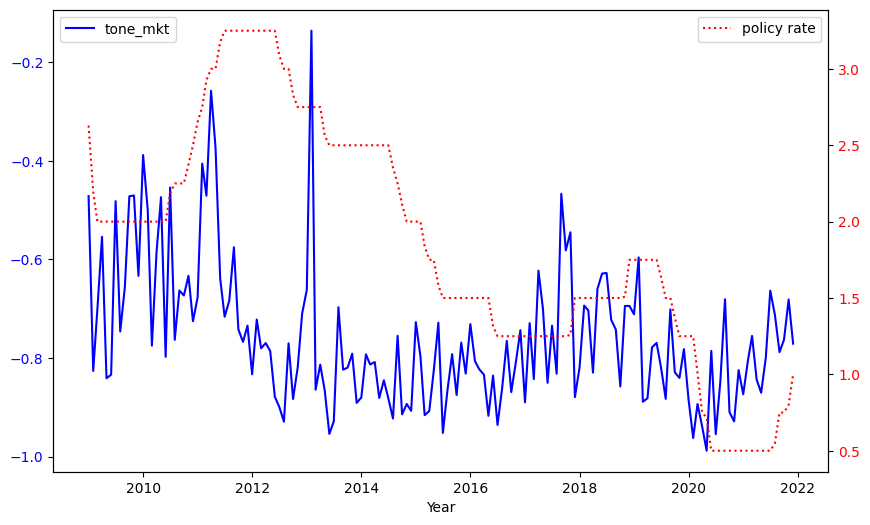

In [5]:
## tone_mkt와 정책금리의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
policy_rate['date'] = pd.to_datetime(policy_rate['date'])

x = policy_rate['date']
y1 = tone_mkt['doc_tone']
y2 = policy_rate['base_rate']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')  # 라벨 추가
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['policy rate'])

plt.show()

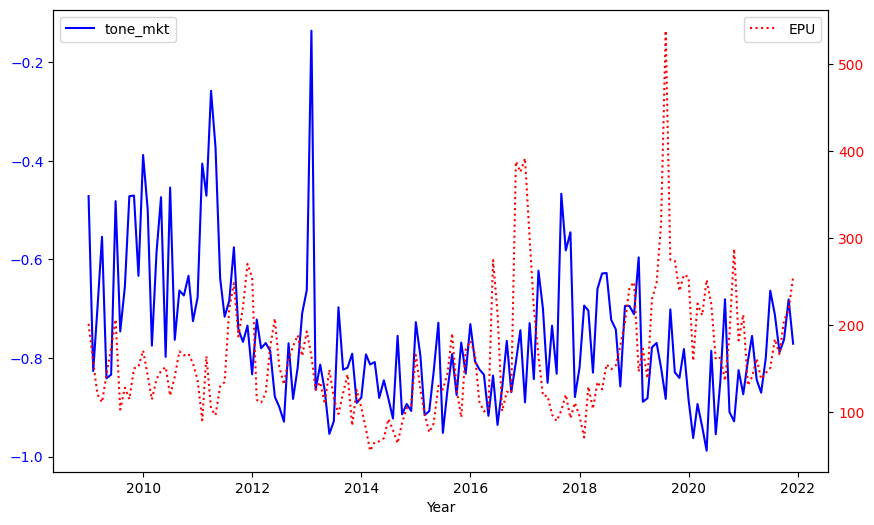

In [6]:
## tone_mkt와 한국 EPU의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
epu_kor['Date'] = pd.to_datetime(epu_kor['Date'])

x = epu_kor['Date']
y1 = tone_mkt['doc_tone']
y2 = epu_kor['EPU_KOR']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['EPU'])

plt.show()

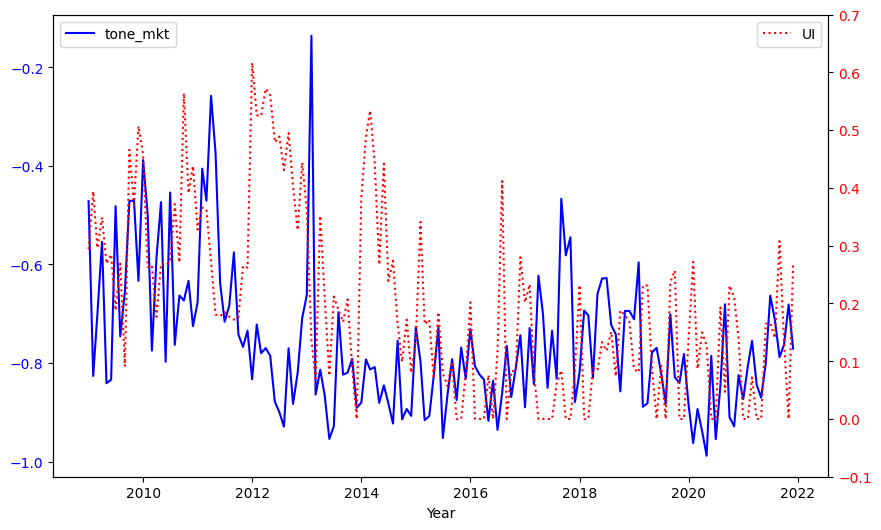

In [7]:
## tone_mkt와 한국 UI의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
ui['Date'] = pd.to_datetime(ui['Date'])

x = ui['Date']
y1 = tone_mkt['doc_tone']
y2 = ui['UI_KOR']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(-0.1, 0.7)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['UI'])

plt.show()

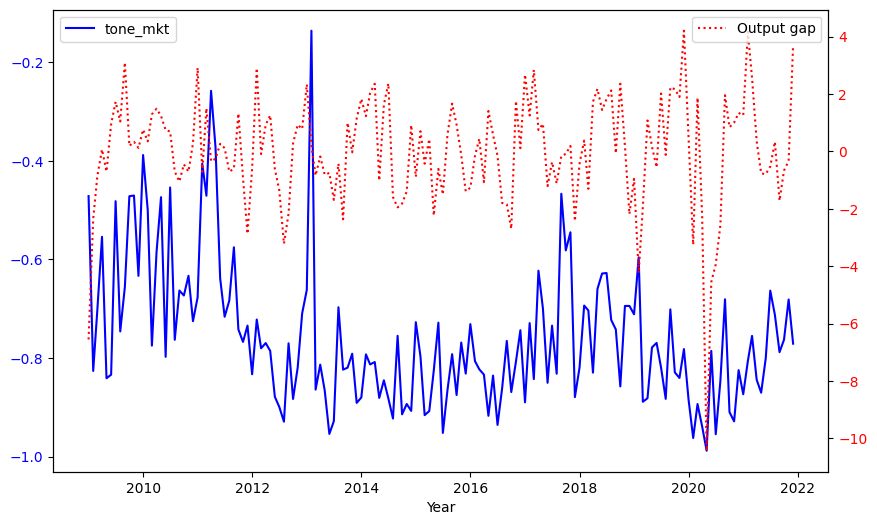

In [8]:
## tone_mkt와 Output gap의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
ip['date'] = pd.to_datetime(ip['date'])

x = ip['date']
y1 = tone_mkt['doc_tone']
y2 = ip['cycle']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['Output gap'])

plt.show()

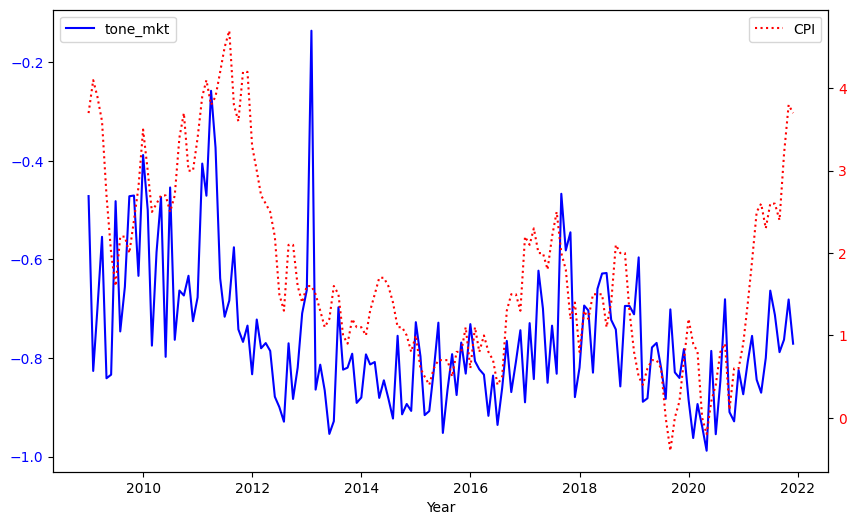

In [9]:
## tone_mkt와 CPI의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
cpi['date'] = pd.to_datetime(cpi['date'])

x = cpi['date']
y1 = tone_mkt['doc_tone']
y2 = cpi['CPI']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['CPI'])

plt.show()

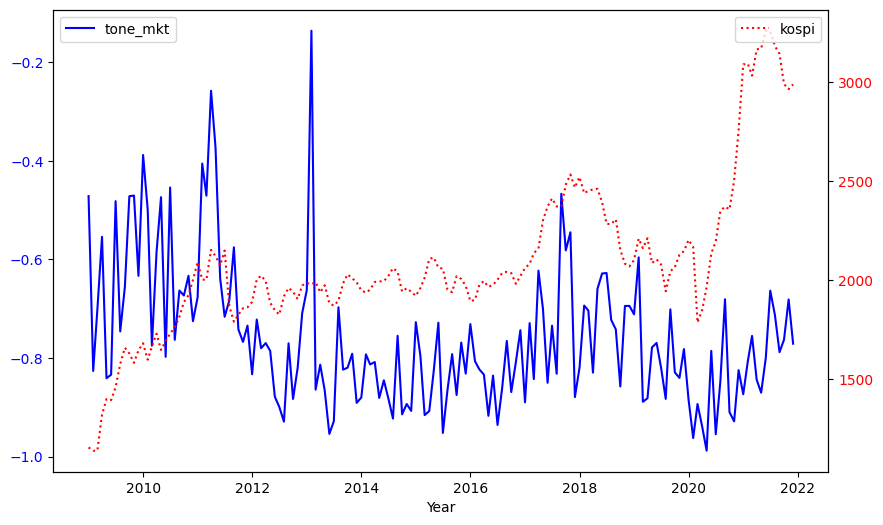

In [10]:
## tone_mkt와 CPI의 상관관계

# 데이터프레임에서 'date' 열을 datetime 형식으로 변환
kospi['날짜'] = pd.to_datetime(kospi['날짜'])

x = kospi['날짜']
y1 = tone_mkt['doc_tone']
y2 = kospi['종가']

fig = plt.figure(figsize=(10, 6))  # 캔버스 생성
ax1 = fig.add_subplot()  # axes 생성

color1 = 'b'
ax1.plot(x, y1, color=color1, label='Line1')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y', labelcolor=color1)

color2 = 'r'
ax2 = ax1.twinx()
# 빨간선을 점선으로 표시
ax2.plot(x, y2, color=color2, linestyle='dotted', label='Line2')
ax2.tick_params(axis='y', labelcolor=color2)

# x 축의 간격을 2년 단위로 설정
ax1.xaxis.set_major_locator(mdates.YearLocator(base=2))

# x 축 레이블 형식을 2년 단위로 지정
date_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_format)

# 범례(레전드) 추가
ax1.legend(loc='upper left', labels=['tone_mkt'])
ax2.legend(loc='upper right', labels=['kospi'])

plt.show()

### 상관계수 구하기

In [13]:
cor = pd.DataFrame()

cor['tone_mkt'] = tone_mkt['doc_tone']
cor['policy_rate'] = policy_rate['base_rate']
cor['epu_kor'] = epu_kor['EPU_KOR']
cor['epu_us'] = epu_us['epu_US']
cor['ui'] = ui['UI_KOR']
cor['ip'] = ip['산업생산지수']
cor['output_gap'] = ip['cycle']
cor['cpi'] = cpi['CPI']
cor['kospi'] = kospi['종가']

In [14]:
cor[['tone_mkt', 'policy_rate', 'epu_kor', 'epu_us', 'ui', 'ip', 'output_gap', 'cpi', 'kospi']].corr()

,tone_mkt,policy_rate,epu_kor,epu_us,ui,ip,output_gap,cpi,kospi
tone_mkt,1.000000,0.229698,-0.090869,-0.038203,0.133848,-0.291294,0.120406,0.497331,-0.132815
policy_rate,0.229698,1.000000,-0.207380,-0.100793,0.599576,-0.512949,0.002263,0.446939,-0.583609
epu_kor,-0.090869,-0.207380,1.000000,0.451787,-0.104883,0.206672,0.053552,-0.073663,0.007994
epu_us,-0.038203,-0.100793,0.451787,1.000000,0.087043,-0.000990,-0.247956,0.096184,-0.021279
ui,0.133848,0.599576,-0.104883,0.087043,1.000000,-0.406099,0.037275,0.377314,-0.392187
ip,-0.291294,-0.512949,0.206672,-0.000990,-0.406099,1.000000,0.272116,-0.357179,0.848773
output_gap,0.120406,0.002263,0.053552,-0.247956,0.037275,0.272116,1.000000,0.057438,0.123643
cpi,0.497331,0.446939,-0.073663,0.096184,0.377314,-0.357179,0.057438,1.000000,-0.118976
kospi,-0.132815,-0.583609,0.007994,-0.021279,-0.392187,0.848773,0.123643,-0.118976,1.000000


<Axes: >

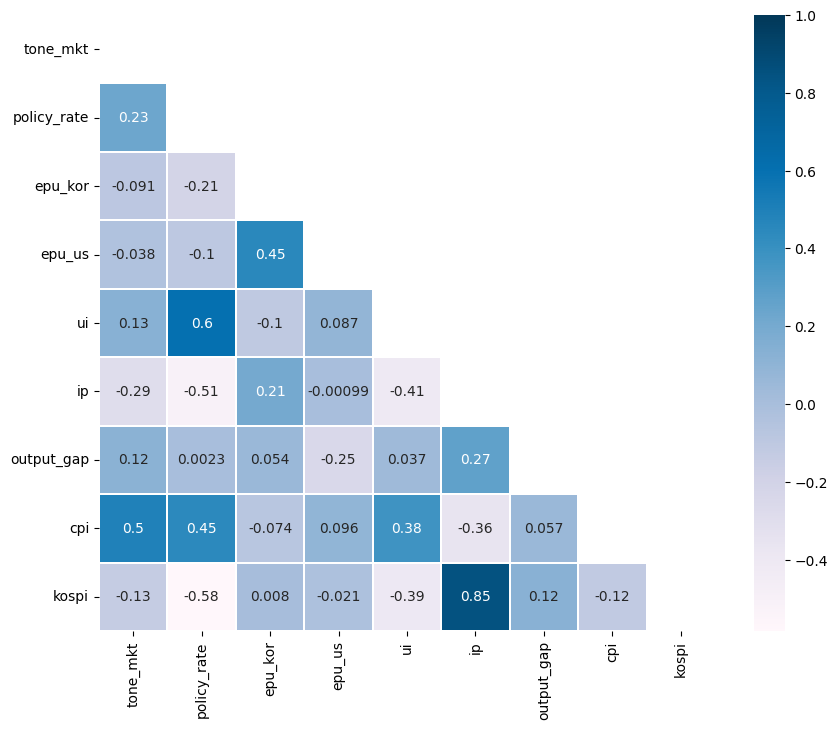

In [15]:
mask = np.triu(np.ones_like(cor.astype(float).corr(), dtype=bool))
 
# mask = mask 옵션을 통해 중복값 제거
colormap = plt.cm.PuBu
plt.figure(figsize=(10,8))
sns.heatmap(cor.astype(float).corr(),linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 10}, mask=mask)